## Grid Room Demo

This notebook demonstrates how to configure a simple grid world, create the environment and displays the transition function and grid world dynamics. Finally it calculates and displays the value optimal policy using Value Iteration.

In [1]:
from env.grid_room import GridRoom
from utility import display as di
from planning.value_iteration import ValueIteration

In [2]:
# grid world parameters are passed to the constructor using a dictionary
options = {'shape': (3,3), 'goals':[4], 'manhattan': True, 'determinism': 1.0}

In [3]:
# instantiate the grid world object
env = GridRoom(options)

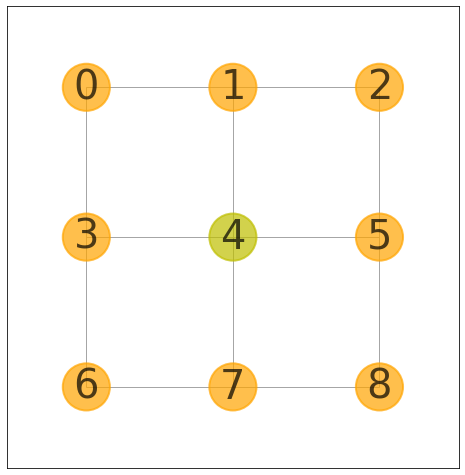

In [4]:
env.plot_graph()

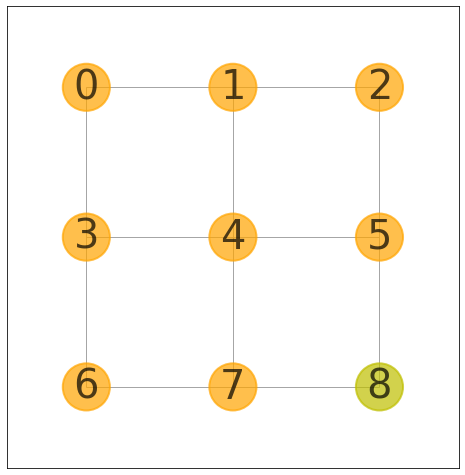

In [5]:
# change the goal state
env.update_dynamics_for_goals([8]);
env.plot_graph()

In [6]:
import pprint as pp
p = pp.PrettyPrinter()

In [7]:
# transition matrix, Pr(s'|s,a)
# similar to the Open AI Gym convention Pr[S][A] = (Pr, S', reward, done)
p.pprint(env.D)

{0: {0: [(1.0, 0, -1, False)],
     1: [(1.0, 1, -1, False)],
     2: [(1.0, 3, -1, False)],
     3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 1, -1, False)],
     1: [(1.0, 2, -1, False)],
     2: [(1.0, 4, -1, False)],
     3: [(1.0, 0, -1, False)]},
 2: {0: [(1.0, 2, -1, False)],
     1: [(1.0, 2, -1, False)],
     2: [(1.0, 5, -1, False)],
     3: [(1.0, 1, -1, False)]},
 3: {0: [(1.0, 0, -1, False)],
     1: [(1.0, 4, -1, False)],
     2: [(1.0, 6, -1, False)],
     3: [(1.0, 3, -1, False)]},
 4: {0: [(1.0, 1, -1, False)],
     1: [(1.0, 5, -1, False)],
     2: [(1.0, 7, -1, False)],
     3: [(1.0, 3, -1, False)]},
 5: {0: [(1.0, 2, -1, False)],
     1: [(1.0, 5, -1, False)],
     2: [(1.0, 8, -1, True)],
     3: [(1.0, 4, -1, False)]},
 6: {0: [(1.0, 3, -1, False)],
     1: [(1.0, 7, -1, False)],
     2: [(1.0, 6, -1, False)],
     3: [(1.0, 6, -1, False)]},
 7: {0: [(1.0, 4, -1, False)],
     1: [(1.0, 8, -1, True)],
     2: [(1.0, 7, -1, False)],
     3: [(1.0, 6, -1, False)]},
 8

In [8]:
# transition matrix 
T, R = env.build_dynamics_as_array()
print(T)

       0    1    2    3    4    5    6    7    8
0,0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0,1  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
0,2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
0,3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1,0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1,1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
1,2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1,3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2,0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2,1  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
2,2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2,3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3,0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3,1  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3,2  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3,3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
4,0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4,1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4,2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
4,3  0.0  0.0  0.0  

## Value Iteration Demo

In [9]:
vi = ValueIteration(env, theta=1e-7)

In [10]:
pi_opt, V_opt = vi.get_opt_policy_utility()
print(vi)


optimal policy:
      0     1     2     3
0  0.00  0.50  0.50  0.00
1  0.00  0.50  0.50  0.00
2  0.00  0.00  1.00  0.00
3  0.00  0.50  0.50  0.00
4  0.00  0.50  0.50  0.00
5  0.00  0.00  1.00  0.00
6  0.00  1.00  0.00  0.00
7  0.00  1.00  0.00  0.00
8  0.25  0.25  0.25  0.25

grid world:
o  o  o
o  o  o
o  o  G

optimal state value function:
     0    1    2
0 -4.0 -3.0 -2.0
1 -3.0 -2.0 -1.0
2 -2.0 -1.0  0.0


<AxesSubplot:>

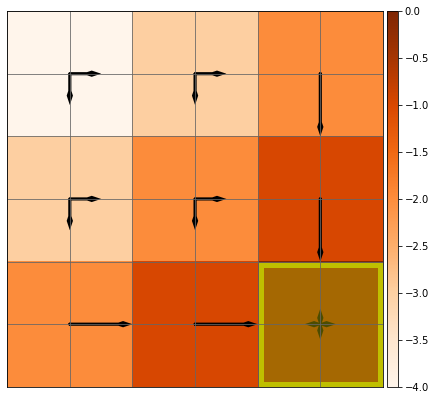

In [11]:
# print the optimal value function and optimal policy on the grid
di.plot_quiver_heatmap_var(env, V_opt, pi_opt)